# Experiment : 04
## *Analyse the impact of optimization and weight initialization techniques such as Xavier initialization, Kaiming Initialization, dropout and regularization techniques and visualize the change in performance.*

In [12]:
# Import necessary libraries
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import numpy as np
from keras import models, layers, optimizers
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# ----------------------------- Data Loading and Preprocessing -----------------------------

# Load CIFAR-10 dataset (50,000 training and 10,000 test images)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the image data to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels (0–9) to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training shape:", X_train.shape)

Training shape: (50000, 32, 32, 3)


## Model 1: Xavier Initialization

In [4]:
# ----------------------------- Model 1: Xavier Initialization -----------------------------

model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=(32, 32, 3)))
model1.add(layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model1.add(layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model1.add(layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))

## Model 2: Kaiming (He) Initialization

In [6]:
# ----------------------------- Model 2: Kaiming (He) Initialization -----------------------------

model2 = models.Sequential()
model2.add(layers.Flatten(input_shape=(32, 32, 3)))
model2.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model2.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal'))
model2.add(layers.Dense(10, activation='softmax', kernel_initializer='he_normal'))

## Model 3: With Dropout Layer

In [7]:
# ----------------------------- Model 3: With Dropout Layer -----------------------------

model3 = models.Sequential()
model3.add(layers.Flatten(input_shape=(32, 32, 3)))
model3.add(layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model3.add(layers.Dropout(0.25))  # Dropout to prevent overfitting
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

 ## Model 4: With Batch Normalization

In [8]:
# ----------------------------- Model 4: With Batch Normalization -----------------------------

model4 = models.Sequential()
model4.add(layers.Flatten(input_shape=(32, 32, 3)))
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.BatchNormalization())         # Normalize layer outputs
model4.add(layers.Activation('relu'))           # Add ReLU again for non-linearity
model4.add(layers.Dense(10, activation='softmax'))

## Optimizer for each model

In [15]:
# ----------------------------- Optimizer for each model -----------------------------

# Create a separate optimizer for each model
sgd_optimizer1 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
sgd_optimizer2 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
sgd_optimizer3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
sgd_optimizer4 = optimizers.SGD(learning_rate=0.01, momentum=0.9)


## Train Model 1: Xavier

In [10]:
# ----------------------------- Train Model 1: Xavier -----------------------------
model1.compile(optimizer=sgd_optimizer1,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
print(model1.summary())
Xavier_history = model1.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
Xavier_score = model1.evaluate(X_test, y_test, batch_size=32)
print("Xavier Score:", Xavier_score)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855,050 (3.26 MB)

 Trainable params: 855,050 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.2692 - loss: 1.9886 - val_accuracy: 0.3450 - val_loss: 1.7848
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3727 - loss: 1.7347 - val_accuracy: 0.4045 - val_loss: 1.6896
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4061 - loss: 1.6528 - val_accuracy: 0.4154 - val_loss: 1.6347
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4265 - loss: 1.6066 - val_accuracy: 0.4198 - val_loss: 1.6287
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4378 - loss: 1.5726 - val_accuracy: 0.4387 - val_loss: 1.5893
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4450 - loss: 1.5475 - val_accuracy: 0.4312 - val_loss: 1.6038
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4576 - loss: 1.5125 - val_accuracy: 0.4395 - val_loss: 1.5890
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4

## Train Model 2: Kaiming

In [16]:
# ----------------------------- Train Model 2: Kaiming -----------------------------
model2.compile(optimizer=sgd_optimizer2,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
print(model2.summary())
Kaiming_history = model2.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
Kaiming_score = model2.evaluate(X_test, y_test, batch_size=128)
print("Kaiming Score:", Kaiming_score)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 129ms/step - accuracy: 0.2681 - loss: 1.9995 - val_accuracy: 0.3368 - val_loss: 1.7978
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 130ms/step - accuracy: 0.3643 - loss: 1.7549 - val_accuracy: 0.3820 - val_loss: 1.7291
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.3916 - loss: 1.6934 - val_accuracy: 0.4130 - val_loss: 1.6344
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 159s 127ms/step - accuracy: 0.4127 - loss: 1.6227 - val_accuracy: 0.3966 - val_loss: 1.6666
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 286s 229ms/step - accuracy: 0.4283 - loss: 1.5906 - val_accuracy: 0.4058 - val_loss: 1.6611
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 312s 249ms/step - accuracy: 0.4339 - loss: 1.5834 - val_accuracy: 0.4415 - val_loss: 1.5784
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 296s 237ms/step - accuracy: 0.4493 - loss: 1.5319 - val_accuracy: 0.4183 - val_loss: 1.6490
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 130ms/step

## Train Model 3: Dropout

In [17]:
# ----------------------------- Train Model 3: Dropout -----------------------------
model3.compile(optimizer=sgd_optimizer3,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
print(model3.summary())
dropout_history = model3.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
dropout_score = model3.evaluate(X_test, y_test, batch_size=128)
print("Dropout Score:", dropout_score)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 678s 542ms/step - accuracy: 0.2171 - loss: 2.0999 - val_accuracy: 0.3226 - val_loss: 1.8779
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 683s 546ms/step - accuracy: 0.2953 - loss: 1.9156 - val_accuracy: 0.3519 - val_loss: 1.8065
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 690s 552ms/step - accuracy: 0.3278 - loss: 1.8386 - val_accuracy: 0.3699 - val_loss: 1.7681
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 546s 437ms/step - accuracy: 0.3366 - loss: 1.8009 - val_accuracy: 0.3592 - val_loss: 1.7784
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 651s 521ms/step - accuracy: 0.3540 - loss: 1.7711 - val_accuracy: 0.3909 - val_loss: 1.7105
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 192s 154ms/step - accuracy: 0.3645 - loss: 1.7531 - val_accuracy: 0.3644 - val_loss: 1.7371
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 181s 145ms/step - accuracy: 0.3683 - loss: 1.7243 - val_accuracy: 0.4008 - val_loss: 1.6718
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 181s 145ms/step

## Train Model 4: Batch Normalization

In [18]:
# ----------------------------- Train Model 4: Batch Normalization -----------------------------
model4.compile(optimizer=sgd_optimizer4,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
print(model4.summary())
BN_history = model4.fit(X_train, y_train, epochs=15, batch_size=128, validation_split=0.2)
BN_score = model4.evaluate(X_test, y_test, batch_size=128)
print("BatchNorm Score:", BN_score)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 790,282 (3.01 MB)

 Trainable params: 789,770 (3.01 MB)

 Non-trainable params: 512 (2.00 KB)

None
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 192s 610ms/step - accuracy: 0.3460 - loss: 1.8692 - val_accuracy: 0.3528 - val_loss: 1.8602
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 189s 604ms/step - accuracy: 0.4574 - loss: 1.5720 - val_accuracy: 0.3768 - val_loss: 1.7852
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 188s 599ms/step - accuracy: 0.4806 - loss: 1.5017 - val_accuracy: 0.4078 - val_loss: 1.6548
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 189s 603ms/step - accuracy: 0.4977 - loss: 1.4421 - val_accuracy: 0.4331 - val_loss: 1.6254
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 185s 592ms/step - accuracy: 0.5128 - loss: 1.4044 - val_accuracy: 0.4091 - val_loss: 1.7631
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 187s 597ms/step - accuracy: 0.5242 - loss: 1.3729 - val_accuracy: 0.3905 - val_loss: 1.7785
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 186s 594ms/step - accuracy: 0.5350 - loss: 1.3354 - val_accuracy: 0.4075 - val_loss: 1.7597
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 205s 656ms/step - accuracy: 0.5

## Plotting Validation Accuracy

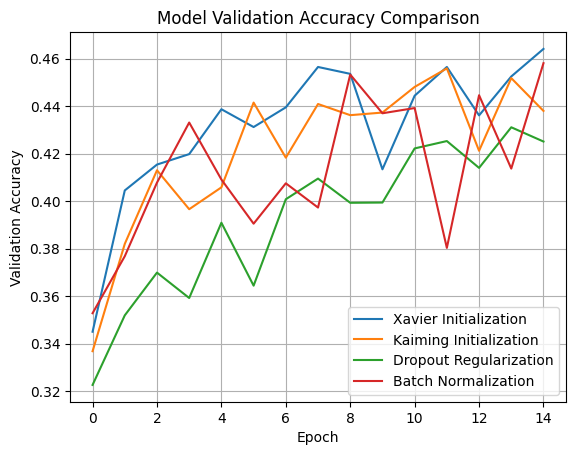

In [19]:
# ----------------------------- Plotting Validation Accuracy -----------------------------
plt.plot(Xavier_history.history['val_accuracy'], label='Xavier Initialization')
plt.plot(Kaiming_history.history['val_accuracy'], label='Kaiming Initialization')
plt.plot(dropout_history.history['val_accuracy'], label='Dropout Regularization')
plt.plot(BN_history.history['val_accuracy'], label='Batch Normalization')
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Model Validation Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()